In [11]:
#still working on the bootstrapping of changes in longitude-averaged China rainfall
#bootstrapping is time-consuming: 1,000 iterations per day per lat ~ 10 hours. Testing at what number of iterations we
#start to see convergence

time: 911 µs


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import timeit
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
%matplotlib notebook
%load_ext autotime
%load_ext autoreload
from bootstrap import *

In [2]:
#Pchina_type, previously written, contains longitudinal averages of different TYPES of china rainfall - total, banded and local

ferretpath = "/Users/Siwen/Desktop/ferret/bin/"
ff = "Pchina_type.nc"
filename = ferretpath + ff
myf = nc.Dataset(filename, 'r')

time: 7.03 ms


In [3]:
P_total =  myf.variables['Pchina_total'][:]
P_band = myf.variables['Pchina_band'][:]
P_local = myf.variables['Pchina_local'][:]

time: 48.4 ms


In [4]:
%load_ext line_profiler

time: 10.3 ms


In [6]:
testinput = np.expand_dims(P_total[:,30,:],1) #necessary to prevent input from collapsing to 2-D

time: 1.07 ms


In [13]:
%timeit bs_diff_rain(testinput[100:110,:,:],[1,29],[30,57],15,1000,2)

(10, 1, 57)
1.5240318775177002
1.5188710689544678
1.661180019378662
1.674649953842163
1.532412052154541
1.4376540184020996
1.41314697265625
1.3988070487976074
1.4112720489501953
1.497464895248413
(10, 1, 57)
1.6955909729003906
1.6372010707855225
1.4565808773040771
1.4038159847259521
1.5442290306091309
1.6039371490478516
1.4061179161071777
1.42529296875
1.402630090713501
1.3966240882873535
(10, 1, 57)
1.3965730667114258
1.3995401859283447
1.46368408203125
1.5289368629455566
1.4191467761993408
1.407517910003662
1.4107270240783691
1.407956838607788
1.3998939990997314
1.405648946762085
(10, 1, 57)
1.4053821563720703
1.402066946029663
1.6170499324798584
1.437007188796997
1.4234039783477783
1.4061729907989502
1.5168521404266357
1.6370658874511719
1.5974910259246826
1.4506361484527588
1 loop, best of 3: 14.2 s per loop
time: 59.2 s


In [19]:
%lprun -f bs_diff_rain bs_diff_rain(testinput[100:110,:,:],[1,29],[30,57],15,1000,2)

(10, 1, 57)
1.8497471809387207
2.020918130874634
1.9494328498840332
2.086735963821411
2.16880202293396
2.182407855987549
2.121245861053467
2.130131959915161
2.0669479370117188
1.852531909942627
time: 20.4 s


In [ ]:
bs_diff_rain(testinput[100:110,:,:],[1,29],[30,57],15,1000,2)

In [5]:
## KEY RESULT - already know that the slowness is with drawing samples, NOT with sorting to figure out the p-value

s1 = P_total[100:115,40,0:29]
s2 = P_total[100:115,40,29:57]
s3 = np.arange(435).reshape(29,15).T

#%lprun -f bs_means_diff_block_ensemble bs_means_diff_block_ensemble(s1, s2, 1000, 2)

time: 2.42 ms


In [10]:
%lprun -f bs_resample_block_ensemble_3 bs_resample_block_ensemble_3(s1,[15,29],2)

time: 6.57 ms


In [10]:
%timeit bs_resample_block_ensemble(s1,[15,29],2)

1000 loops, best of 3: 700 µs per loop
time: 2.91 s


In [9]:
%timeit bs_resample_block_ensemble_3(s1,[15,29],2)

1000 loops, best of 3: 482 µs per loop
time: 2 s


In [20]:
bs_resample_block_ensemble_nu(s3,[15,29],9).T

array([[ 168.,  169.,  170.,  171.,  172.,  173.,  174.,  175.,  176.,
         393.,  394.,  395.,  396.,  397.,  398.],
       [ 201.,  202.,  203.,  204.,  205.,  206.,  207.,  208.,  209.,
         409.,  410.,  411.,  412.,  413.,  414.],
       [ 380.,  381.,  382.,  383.,  384.,  385.,  386.,  387.,  388.,
         377.,  378.,  379.,  380.,  381.,  382.],
       [ 287.,  288.,  289.,  290.,  291.,  292.,  293.,  294.,  295.,
         123.,  124.,  125.,  126.,  127.,  128.],
       [   2.,    3.,    4.,    5.,    6.,    7.,    8.,    9.,   10.,
          50.,   51.,   52.,   53.,   54.,   55.],
       [ 351.,  352.,  353.,  354.,  355.,  356.,  357.,  358.,  359.,
         180.,  181.,  182.,  183.,  184.,  185.],
       [ 260.,  261.,  262.,  263.,  264.,  265.,  266.,  267.,  268.,
         182.,  183.,  184.,  185.,  186.,  187.],
       [ 304.,  305.,  306.,  307.,  308.,  309.,  310.,  311.,  312.,
         274.,  275.,  276.,  277.,  278.,  279.],
       [ 424.,  425.,  4

time: 10.5 ms


In [70]:
#to test, we run at one particular latitude for the entire year, then test the change in p-values
results = np.zeros((7,100)) #just running this code for days 100-200 in the interest of time
itertest = 100 * 2**np.arange(7)
testinput = np.expand_dims(P_total[:,30,:],1) #necessary to prevent input from collapsing to 2-D

for niter, i in zip(itertest,np.arange(7)):
    
    print(niter)
    print(i)
    results[i,:] = np.squeeze(bs_diff_rain(testinput[100:200,:,:],[1,29],[30,57],15,niter,2))

100
0
0.15249109268188477
0.1574869155883789
0.14703822135925293
0.15920710563659668
0.15522408485412598
0.16158103942871094
0.1538999080657959
0.16594505310058594
0.1499490737915039
0.17547392845153809
0.1519908905029297
0.16425204277038574
0.15482187271118164
0.16463708877563477
0.15172910690307617
0.16254591941833496
0.147050142288208
0.15273809432983398
0.14789080619812012
0.15473699569702148
0.1514291763305664
0.1558220386505127
0.14361786842346191
0.15568089485168457
0.15098810195922852
0.17415690422058105
0.15370488166809082
0.16618800163269043
0.14732098579406738
0.15499591827392578
0.1465139389038086
0.15224909782409668
0.14838886260986328
0.15643000602722168
0.1474001407623291
0.15917491912841797
0.14756107330322266
0.15390610694885254
0.14849114418029785
0.152724027633667
0.14768719673156738
0.15281295776367188
0.15295004844665527
0.15224504470825195
0.14795398712158203
0.15221214294433594
0.14816498756408691
0.15508317947387695
0.14712810516357422
0.15492892265319824
0.1499

In [75]:
rdelta = results[1:7,:] - results[0:6,:] #what is the change in p-value when we increase the number of iterations?
rdelta_abs = abs(rdelta) #absolute value of change
rdelta_mean = np.mean(rdelta_abs,1) #mean change

time: 1.51 ms


<IPython.core.display.Javascript object>


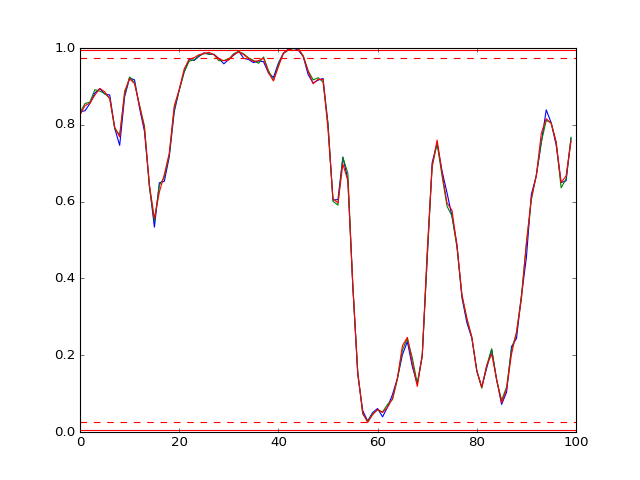

<function matplotlib.pyplot.legend>

time: 218 ms


In [123]:
plt.plot(results[0,:])
plt.plot(results[1,:])
plt.plot(results[2,:])
plt.plot(results[3,:])
plt.plot(results[4,:])
plt.plot(results[5,:])
plt.plot(results[6,:])
plt.plot((0,100),(.025,.025),'r--')
plt.plot((0,100),(.005,.005),'r')
plt.plot((0,100),(.975,.975),'r--')
plt.plot((0,100),(.995,.995),'r')
plt.legend

#SUGGESTION: 2,000 iterations or above should do the trick.

In [ ]:
## WORKHORSE CELL - main simulation runs performed here

In [52]:
np.modulo(5,3)

AttributeError: module 'numpy' has no attribute 'modulo'

time: 5.33 ms


In [54]:
76 % 11

10

time: 1.85 ms
